In [80]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [63]:
df = pd.read_csv("Pokemon.csv" ,index_col=0, encoding='latin')

In [64]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


(0.0, 160.0)

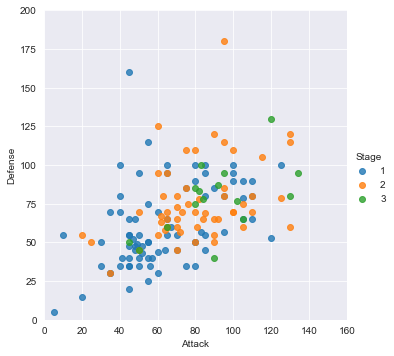

In [65]:
sns.set_style('darkgrid')
sns.lmplot(x='Attack', y='Defense', data=df, 
           fit_reg=False, #no regression line
           hue='Stage')   #Colour by evolution stage


# Tweak using matplotlib
plt.ylim(0,200)
plt.xlim(0,160)

<AxesSubplot:>

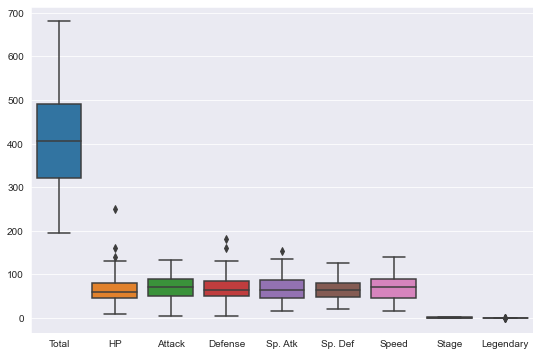

In [66]:
#Boxplot

plt.figure(figsize=(9,6)) #Set plot dimensions
sns.boxplot(data=df)

<AxesSubplot:>

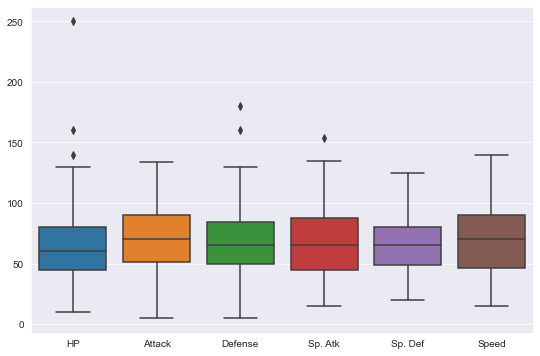

In [67]:
#Preprocess DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

#New boxplot using stats_df
plt.figure(figsize=(9,6)) # set plot dimensions
sns.boxplot(data=stats_df)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

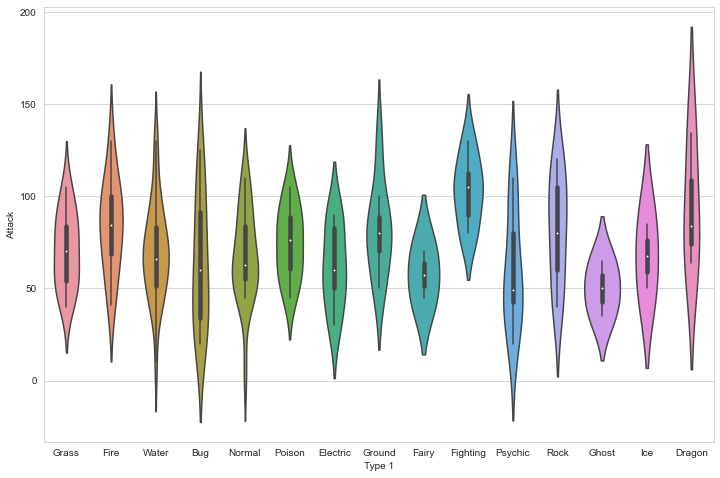

In [68]:
#Set theme
sns.set_style('whitegrid')

# Violin plot
plt.figure(figsize=(12,8))# set plot dimensions
sns.violinplot(x='Type 1', y='Attack', data=df)

In [69]:
#Color Palettes

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

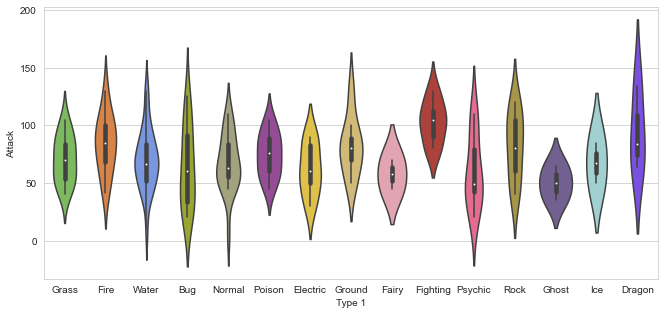

In [70]:
# Violin plot with pokemon color palette

plt.figure(figsize=(11,5)) # set plot dimensions
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

<AxesSubplot:xlabel='Type 2', ylabel='Attack'>

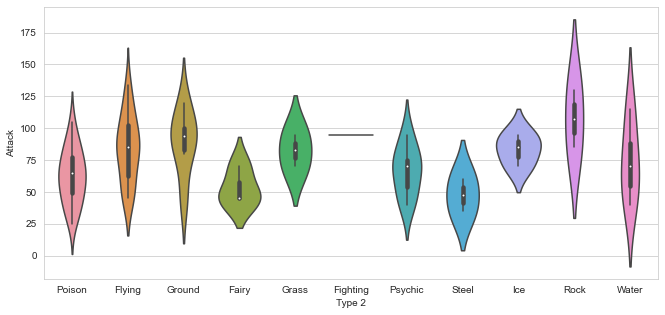

In [71]:
plt.figure(figsize=(11,5))
sns.violinplot(x='Type 2', y='Attack', data=df, pallete=pkmn_type_colors)

<AxesSubplot:xlabel='Type 1', ylabel='Defense'>

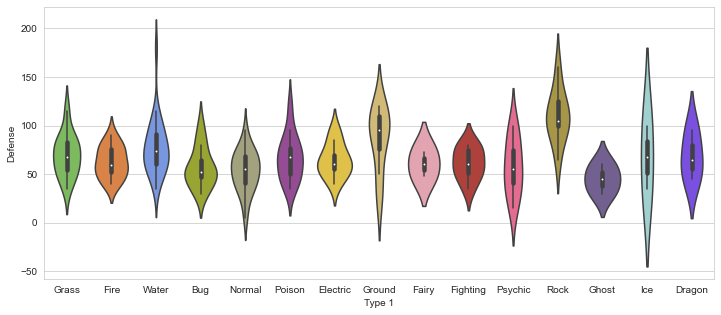

In [72]:
plt.figure(figsize=(12,5))
sns.violinplot(x='Type 1', y='Defense', data=df, palette=pkmn_type_colors)

<AxesSubplot:xlabel='Type 2', ylabel='Defense'>

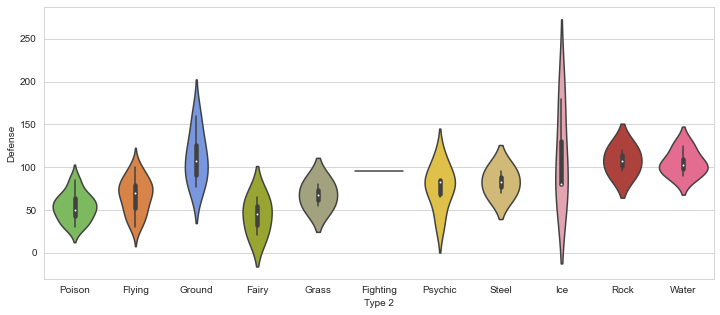

In [73]:
plt.figure(figsize=(12,5))
sns.violinplot(x='Type 2', y='Defense', data=df, palette=pkmn_type_colors)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

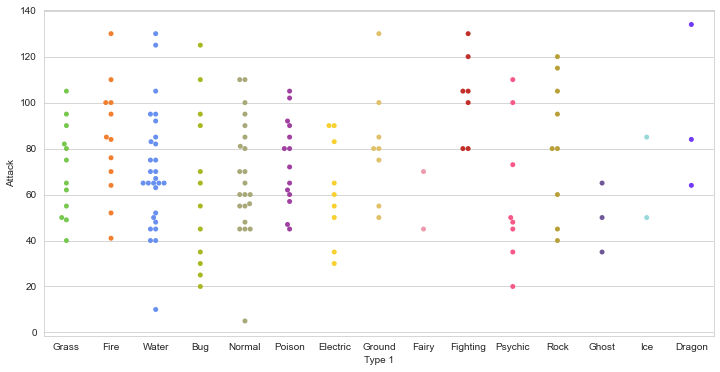

In [74]:
#swarm plot with Pokemon color palette
plt.figure(figsize=(12,6))
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

<AxesSubplot:xlabel='Type 2', ylabel='Attack'>

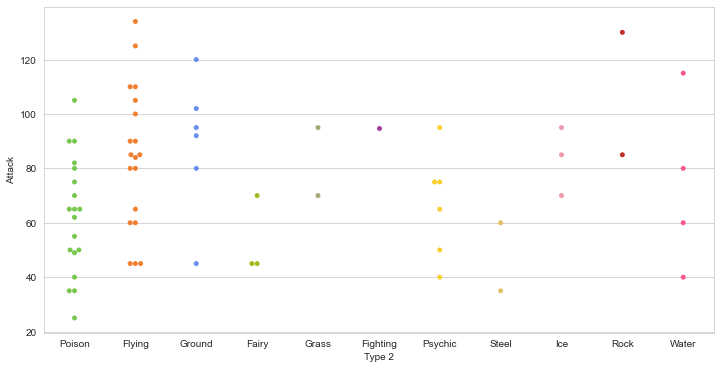

In [75]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='Type 2', y='Attack', data=df, palette=pkmn_type_colors)

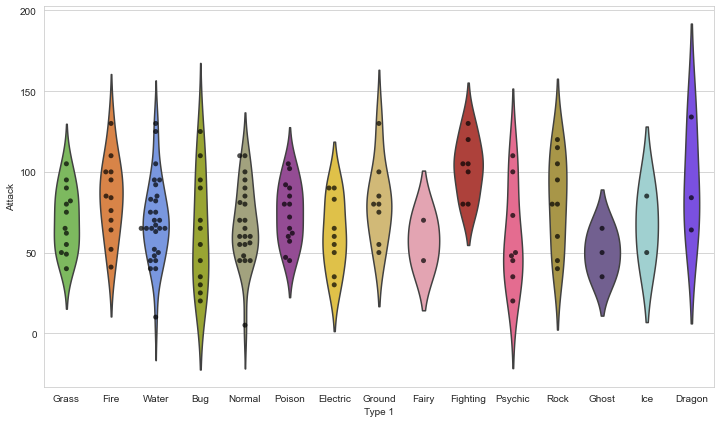

In [76]:
#Overlaying plots
plt.figure(figsize=(12,7))

#Create plot
sns.violinplot(x='Type 1', 
               y='Attack', 
               data=df, 
               inner=None, 
               palette=pkmn_type_colors)

sns.swarmplot(x='Type 1',
              y='Attack',
             data=df,
             color='black', # Make points black
             alpha=0.7) # slightly transparent

plt.title=('Attack by Type')

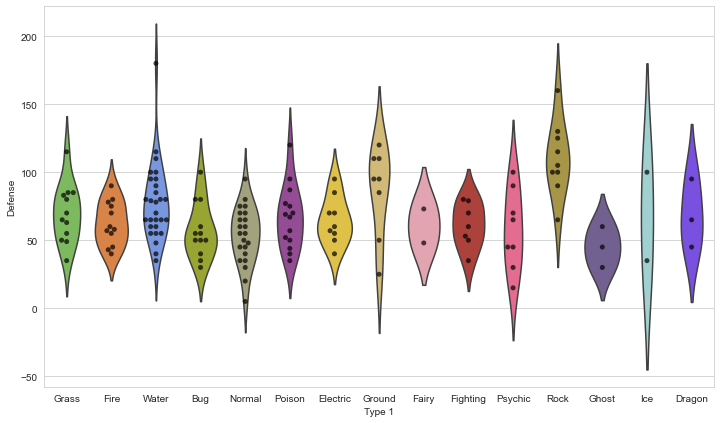

In [77]:
plt.figure(figsize=(12,7))

sns.violinplot(x='Type 1',
              y='Defense',
              data=df,
              inner=None,
              palette=pkmn_type_colors)

sns.swarmplot(x='Type 1',
             y='Defense',
             data=df,
             color='black',
             alpha=0.7)

plt.title=('Defense by Type')

In [78]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [102]:
#Melt DataFrame
melted_df = pd.melt(stats_df,
                   id_vars=["Name", "Type 1", "Type 2"],
                   var_name="Stat")
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


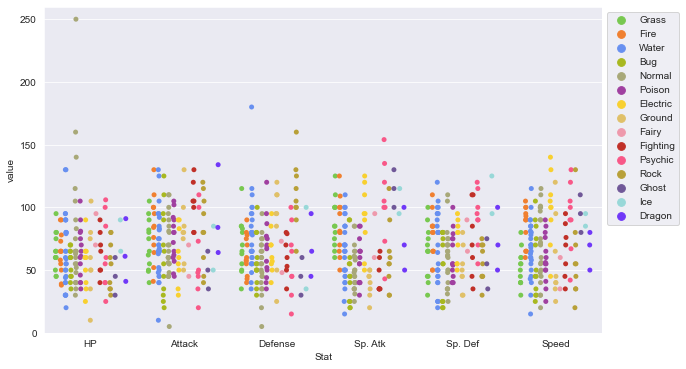

In [109]:
# Swarmplot with melted_df
plt.figure(figsize=(10,6))
sns.stripplot(x='Stat',
              y='value',
              data=melted_df,
              hue='Type 1',
             dodge=True,
             palette=pkmn_type_colors)
plt.ylim(0,260)
plt.legend(bbox_to_anchor=(1,1), loc=2)

<AxesSubplot:>

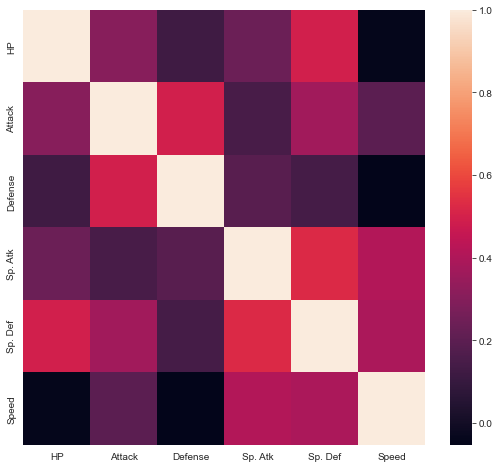

In [110]:
#calculate correlations
corr = stats_df.corr()

# Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr)

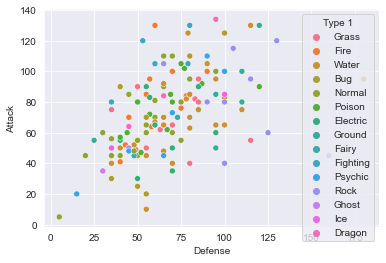

In [104]:
sns.set_style('darkgrid')
sns.scatterplot(
    data=df,
    x= 'Defense',
    y= 'Attack',
    hue = 'Type 1',
legend='auto')

#plt.title('Pokemon Defense and Attack Stat')
plt.show()

<AxesSubplot:xlabel='Attack', ylabel='Count'>

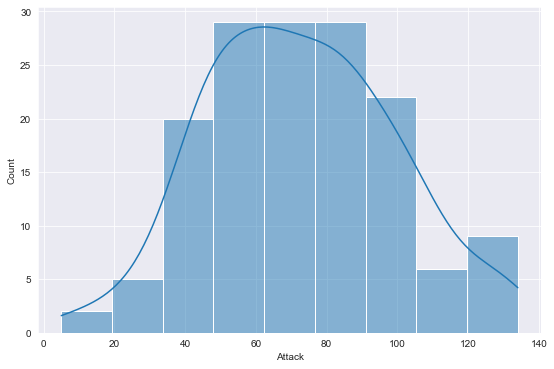

In [112]:
# distribution plot
plt.figure(figsize=(9,6))
sns.histplot(df, x='Attack', kde=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon')])

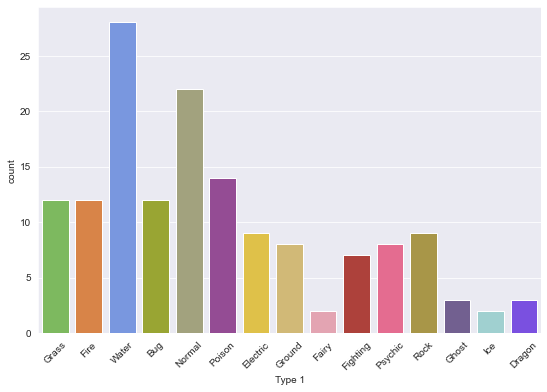

In [113]:
# count plot (aka bar plot)
plt.figure(figsize=(9,6))
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

#rotate x -lables
plt.xticks(rotation=45)

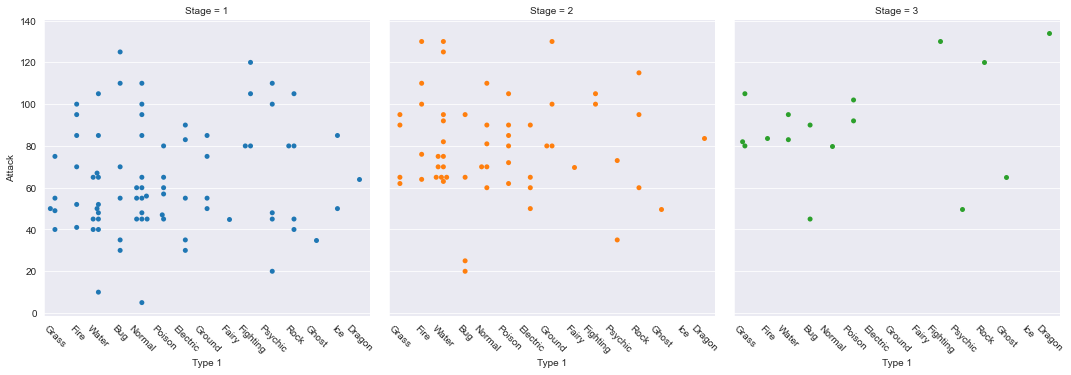

In [114]:
# Categorical Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45) 

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

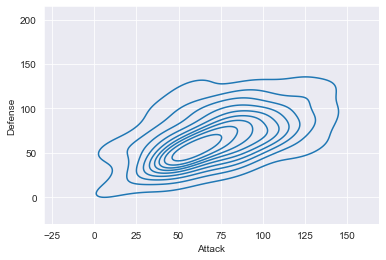

In [115]:
# density plot
sns.kdeplot(x='Attack', y='Defense', data=df)

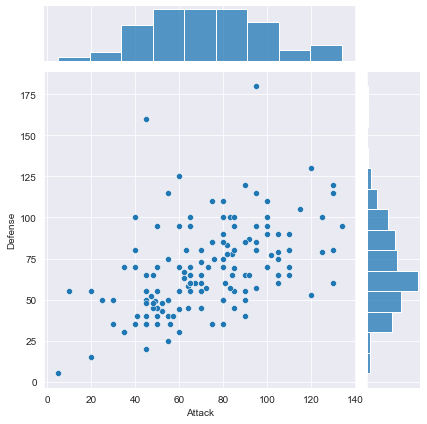

In [116]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)